In [1]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.util import IMAGE_SHRINK_SCALE, REFERENCE_IMAGE, REFERENCE_IMAGE_MONDRIAAN, REFERENCE_IMAGE_DONALD, REFERENCE_IMAGE_CITY
from vangogh.evaluation import *
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import seaborn as snsblock_coordinates
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count

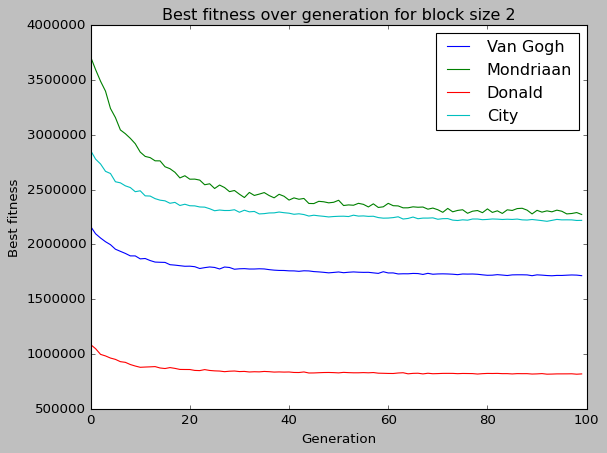

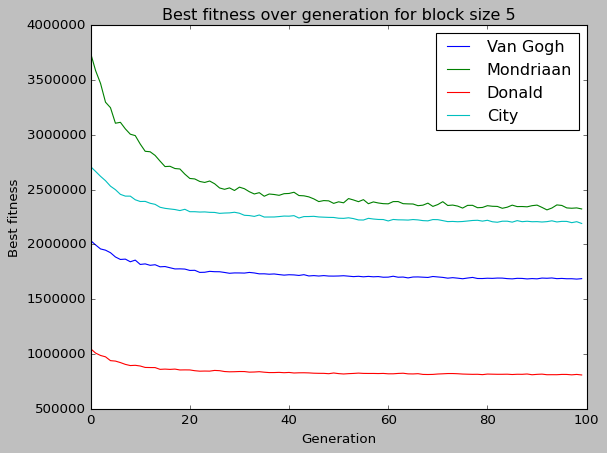

In [2]:
from vangogh.model_based import *

block_sizes = [2,5, 10, 20]


def do_experiment(n, generations, reference_img, block_size, name):
    averaged_fitness_scores = np.zeros(generations)
    averaged_histogram_intersections = np.array(generations)
    for time in range(n):
        fitness_scores, histogram_intersections, best_offspring = select_blocks(reference_img, block_size, 100, 10, generations)
        img = draw_voronoi_image(best_offspring[0], reference_img.width, reference_img.height)
        img.save(f"./img/{name}_final_{block_size}.png")
        averaged_fitness_scores = np.add(averaged_fitness_scores, fitness_scores)
        averaged_histogram_intersections = np.add(averaged_histogram_intersections, histogram_intersections)
        
    averaged_fitness_scores = np.divide(averaged_fitness_scores, n)
    averaged_histogram_intersections = np.divide(averaged_histogram_intersections, n)

    return averaged_fitness_scores, averaged_histogram_intersections

def plot_fitness_scores_over_generation(fitness_scores,names, block_size):
    assert len(fitness_scores) == len(names)
    plt.title(f"Best fitness over generation for block size {block_size}")
    plt.xlabel("Generation")
    plt.ylabel("Best fitness")
    for i in range(len(fitness_scores)):
        plt.plot(fitness_scores[i], label=names[i])
    plt.legend()
    plt.show()

def plot_histogram_intersections_over_generation(histogram_intersections,names, block_size):
    assert len(histogram_intersections) == len(names)
    plt.title(f"Histogram intersection for block size {block_size}")
    plt.xlabel("Generation")
    plt.ylabel("Histogram intersection")
    for i in range(len(histogram_intersections)):
        plt.plot(histogram_intersections[i], label=names[i])
    plt.legend()
    plt.show()

generations = 100
for block_size in block_sizes:
    average_fitness_scores_gogh, average_histograms_gogh = do_experiment(5, generations, REFERENCE_IMAGE, block_size, "Van Gogh")
    average_fitness_scores_mond, average_histograms_mond = do_experiment(5, generations, REFERENCE_IMAGE_MONDRIAAN, block_size, "Mondriaan")
    average_fitness_scores_donald, average_histograms_donald = do_experiment(5, generations, REFERENCE_IMAGE_DONALD, block_size, "Donald")
    average_fitness_scores_city, average_histograms_city = do_experiment(5, generations, REFERENCE_IMAGE_CITY, block_size, "City")

    names = ["Van Gogh", "Mondriaan", "Donald", "City"]
    fitness_scores = [average_fitness_scores_gogh, average_fitness_scores_mond, average_fitness_scores_donald, average_fitness_scores_city]
    histogram_intersections = [average_histograms_gogh, average_histograms_mond, average_histograms_donald, average_histograms_city]

    plot_fitness_scores_over_generation(fitness_scores, names, block_size)
    plot_histogram_intersections_over_generation(histogram_intersections, names, block_size)
   